# Comparing recent mobility trends in New York City and San Francisco

Adapted from https://www.kaggle.com/annaepishova/starter-google-community-mobility-reports

In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
from google.cloud import bigquery
client = bigquery.Client()
dataset = client.get_dataset('bigquery-public-data.covid19_google_mobility')
tables = list(client.list_tables(dataset))

Using Kaggle's public dataset BigQuery integration.


In New York City, people are spending a lot more time at home and a lot less time everywhere else.


<Figure size 432x288 with 0 Axes>

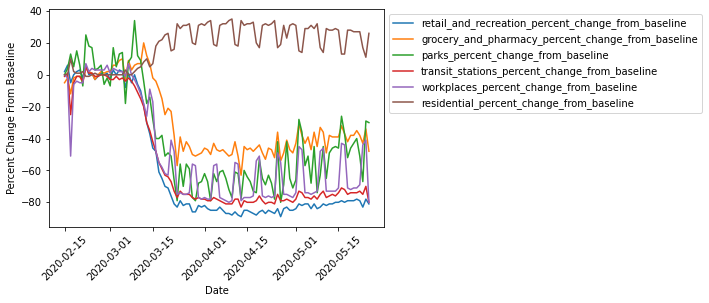

In [18]:
print('New York City')
sql = '''
SELECT
  *
FROM
  `bigquery-public-data.covid19_google_mobility.mobility_report` 
WHERE
  country_region = "United States"
  AND sub_region_1 = "New York"
  AND sub_region_2 = "New York County"
  AND date BETWEEN "2020-01-10" AND "2020-05-31"
ORDER BY
  date
'''
query_job = client.query(sql)
df = query_job.to_dataframe()
fig = plt.figure();
df.plot(x='date', rot=45, y=['retail_and_recreation_percent_change_from_baseline',                                  
                             'grocery_and_pharmacy_percent_change_from_baseline',
                             'parks_percent_change_from_baseline',
                             'transit_stations_percent_change_from_baseline',
                             'workplaces_percent_change_from_baseline',
                             'residential_percent_change_from_baseline'])
plt.legend(bbox_to_anchor=(1, 0.5), loc='lower left')
plt.xlabel('Date')
plt.ylabel('Percent Change From Baseline')
plt.show()

In San Francisco, people are spending a lot more time at home and in parks but a lot less time everywhere else.


<Figure size 432x288 with 0 Axes>

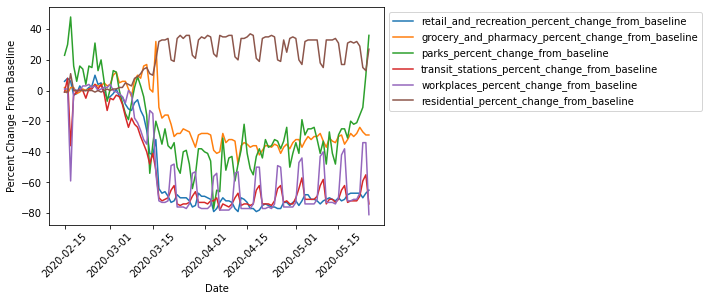

In [19]:
print('San Francisco')
sql = '''
SELECT
  *
FROM
  `bigquery-public-data.covid19_google_mobility.mobility_report` 
WHERE
  country_region = "United States"
  AND sub_region_1 = "California"
  AND sub_region_2 = "San Francisco County"
  AND date BETWEEN "2020-01-10" AND "2020-05-31"
ORDER BY
  date
'''
query_job = client.query(sql)
df = query_job.to_dataframe()
fig = plt.figure();
df.plot(x='date', rot=45, y=['retail_and_recreation_percent_change_from_baseline',                                  
                             'grocery_and_pharmacy_percent_change_from_baseline',
                             'parks_percent_change_from_baseline',
                             'transit_stations_percent_change_from_baseline',
                             'workplaces_percent_change_from_baseline',
                             'residential_percent_change_from_baseline'])
plt.legend(bbox_to_anchor=(1, 0.5), loc='lower left')
plt.xlabel('Date')
plt.ylabel('Percent Change From Baseline')
plt.show()

* In New York City, people are spending a lot more time at home and a lot less time everywhere else.
* In San Francisco, people are spending a lot more time at home and in parks but a lot less time everywhere else.
* It will be interesting to see what the data looks like for the end of May and the beginning of June.